In [53]:
import plotly.express as px
from scipy import stats
from SiFoN import viz
import pandas as pd
import numpy as np
from SiFoN import clinical_analysis as clin

In [2]:
data = np.load("../../black_supp4/2m.near_tss.background.1000G_EUR.npy")

In [34]:
mean = data.mean(axis = 0)[:40]
std = data.std(axis = 0)[:40]

In [35]:
mean.shape

(40,)

In [4]:
file = "test_input_data/chr10_89580225_89633389_sequence_class_scores.npy"
vcf = pd.read_csv("test_input_data/chr10_89580225_89633389.vcf", 
                  header=None, sep="\t", 
                  names=["Chromosome", "Position", "SNP", "Ref", "Alt"])

In [36]:
scores_signed = viz.preprocess(file, vcf, signed=True)

In [37]:
scores_norm = (scores_signed - mean)/std

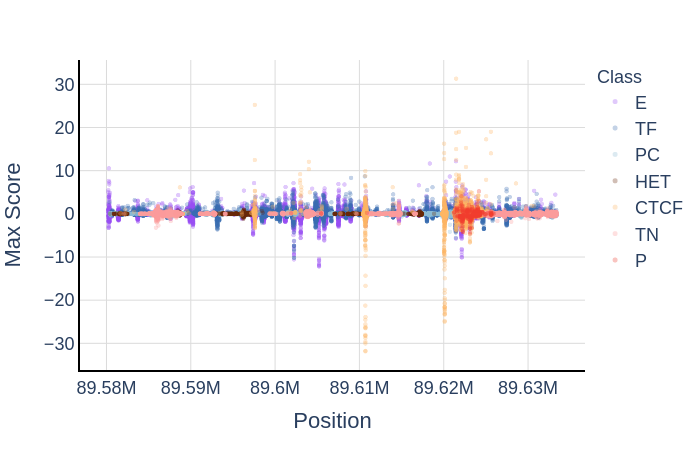

In [7]:
max_scores_signed = viz.find_max(scores_signed, signed=True)
viz.plot_max("test", max_scores_signed)

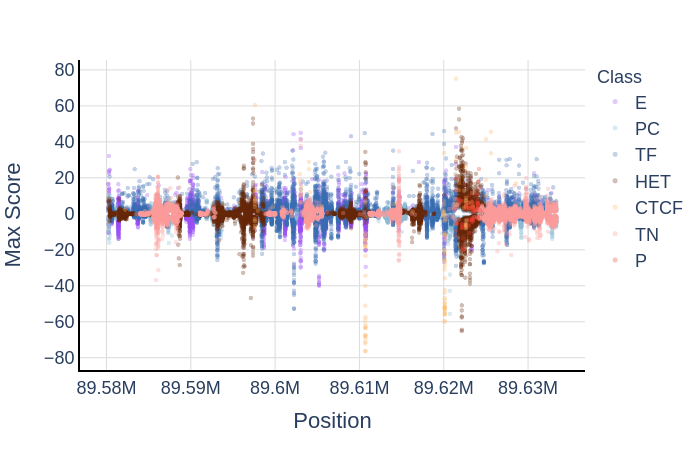

In [39]:
max_scores_signed = viz.find_max(scores_norm, signed=True)
viz.plot_max("noramlized_PTEN.html", max_scores_signed)

In [48]:
row_labels = pd.read_csv("test_input_data/PTEN_row_labels", header=0) # Description of SNPs
scores = pd.read_csv("test_input_data/PTEN_sequence_class_scores.npy") # Sequence class scores
## new code
scores = (scores - mean)/std
## new code
dis_score = pd.read_csv("test_input_data/PTEN_DIS.csv") # Disease impact score
scores["Disease Impact Score"] = dis_score["Disease Impact Score"]
scores["Alteration"] = row_labels["Alteration"]
clinical_data = pd.read_csv("test_input_data/PTEN_Brown_Suppl4.csv")
scores = clinical_data.merge(scores) # Clinical data connects to the Sei results by the `Alteration` column.
scores.head()

,Alteration,Breast Cancer Case Alleles,Control Alleles,Classification,PC1 Polycomb / Heterochromatin,L1 Low signal,TN1 Transcription,TN2 Transcription,L2 Low signal,E1 Stem cell,...,TF4 OTX2,HET4 Heterochromatin,L7 Low signal,PC4 Polycomb / Bivalent stem cell Enh,HET5 Centromere,E11 T-cell,TF5 AR,E12 Erythroblast-like,HET6 Centromere,Disease Impact Score
0,c.-976G>C,46,40,VUS,0.483225,0.267553,0.153611,0.163356,0.246237,0.157342,...,0.175452,0.070708,0.394796,0.334763,0.367920,0.626355,0.177994,0.034287,0.159081,-0.310427
1,c.-835C>T,14,10,VUS,-0.613688,-0.381005,-0.204926,-0.143405,-0.402147,-0.751673,...,-0.590588,-0.779706,-1.047871,-0.527129,-1.835208,-1.255572,-0.407220,-1.051151,-2.159230,-0.305452
2,c.-931G>A,0,1,VUS,-3.744769,-3.705930,-1.932729,-2.001334,-4.139334,-3.562207,...,-4.069733,-2.466587,-5.170651,-4.660257,-9.422066,-8.532908,-2.949133,-7.470218,-8.241153,4.723788
3,c.-765G>A,5,1,VUS,-0.318161,0.520063,0.163184,0.215685,0.621889,0.798309,...,0.626632,-0.065811,0.285586,0.113139,0.855411,0.644858,0.315789,0.454786,0.787346,-0.308408
4,c.-1151C>G,0,1,VUS,0.081402,-1.006612,-0.664230,-0.707118,-1.423958,-1.628674,...,-1.949326,0.219996,-0.988316,-0.084469,-2.626241,-2.175260,-0.881015,-0.587708,-3.053801,-0.277283


In [49]:
clin.odds_ratio(df=scores, control_col="Control Alleles", case_col = "Breast Cancer Case Alleles",
               num_cases = 52065, num_controls = 28549, correction = 0.1)
clin.add_case_control_label(df=scores, case_cuttoff = 1.5, control_cutoff = 0.5)
scores.head(1) # see the last two columns

,Alteration,Breast Cancer Case Alleles,Control Alleles,Classification,PC1 Polycomb / Heterochromatin,L1 Low signal,TN1 Transcription,TN2 Transcription,L2 Low signal,E1 Stem cell,...,L7 Low signal,PC4 Polycomb / Bivalent stem cell Enh,HET5 Centromere,E11 T-cell,TF5 AR,E12 Erythroblast-like,HET6 Centromere,Disease Impact Score,Odds Ratio,Case/Control
0,c.-976G>C,46,40,VUS,0.483225,0.267553,0.153611,0.163356,0.246237,0.157342,...,0.394796,0.334763,0.36792,0.626355,0.177994,0.034287,0.159081,-0.310427,0.476967,Control


In [56]:
scores = pd.read_csv("test_input_data/PTEN_sequence_class_scores.npy")
scores = (scores - mean)/std
max_scores = viz.find_max(scores, signed=True).drop(columns="index")
max_scores["Disease Impact Score"] = dis_score["Disease Impact Score"]
max_scores["Alteration"] = row_labels["Alteration"]
max_scores = clinical_data.merge(max_scores)
clin.odds_ratio(df=max_scores, control_col="Control Alleles", case_col = "Breast Cancer Case Alleles",
               num_cases = 52065, num_controls = 28549, correction = 0.1)
clin.add_case_control_label(df=max_scores, case_cuttoff = 1.5, control_cutoff = 0.5)
max_scores.head(1)

,Alteration,Breast Cancer Case Alleles,Control Alleles,Classification,Max Score,Sequence Name,Sequence Index,Class,Color,Function,Disease Impact Score,Odds Ratio,Case/Control
0,c.-976G>C,46,40,VUS,0.751613,E5 B-cell-like,12,E,#984ef3,Active,-0.310427,0.476967,Control


In [58]:
max_scores["Position on chrom10"] = row_labels["pos"]

fig = px.scatter(max_scores, x="Position on chrom10", y="Disease Impact Score", color="Class", 
                 color_discrete_sequence = max_scores["Color"].unique(), hover_data=max_scores.columns)
viz.white_bg(fig)
fig.update_traces(marker={'size': 8})
fig.update_layout(font=dict(size=18))
fig.write_html("DIS_v_pos.html")
fig.show()

In [60]:
fig = px.scatter(max_scores, x="Position on chrom10", y="Max Score", color="Class", 
                 color_discrete_sequence = max_scores["Color"].unique(), hover_data=max_scores.columns)
viz.white_bg(fig)
fig.update_traces(marker={'size': 8})
fig.update_layout(font=dict(size=18))
fig.write_html("max_v_pos.html")
fig.show()